# ASK

## Description du projet : Analyse exploratoire de données Marketing

### **1. Contexte**
Le projet se déroule dans un **secteur bancaire de plus en plus concurrentiel**. Pour garantir sa rentabilité et améliorer l'expérience de ses clients, une institution bancaire portugaise cherche à optimiser l'efficacité de ses campagnes de **marketing direct** (appels téléphoniques). L'enjeu est de passer d'une approche massive à un ciblage stratégique basé sur les données.

### **2. Problématique**
La banque doit déterminer **quels clients cibler en priorité** pour maximiser les souscriptions aux **dépôts à terme**. D'un point de vue technique, il s'agit d'un problème de **classification** : il faut prédire si la variable cible « y » (souscription du client) sera « yes » ou « no » en fonction du profil du client et des interactions passées.

### **3. Objectifs**
*   **Analyse exploratoire (EDA) :** Explorer les données pour extraire des insights stratégiques.
*   **Validation statistique :** Appliquer des méthodes avancées (ANOVA, Khi-deux, etc.) pour valider les résultats de manière objective.
*   **Modélisation prédictive :** Développer un modèle simple (type KNN) pour prédire l'acceptation des clients.
*   **Aide à la décision :** Fournir des recommandations concrètes et des scénarios pour maximiser le retour sur investissement.

### **4. Besoins**
*   **Données :** Un jeu de données de **45 211 instances** comportant **16 variables** telles que l'âge, l'emploi, le solde bancaire et l'historique des contacts.
*   **Méthodologie :** Application de la démarche **CRISP-DM** (Compréhension, Préparation, Analyse, Modélisation, Évaluation, Recommandations).
*   **Outils technologiques :**
    *   **Langage :** Python.
    *   **Bibliothèques :** Pandas, NumPy, Scikit-Learn, Matplotlib, Seaborn.
    *   **Optionnel :** Streamlit pour la création d'un tableau de bord interactif.
*   **Livrables :** Un rapport d'analyse, le code source documenté (Notebooks) et les recommandations stratégiques.

# PREPARE

In [55]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [56]:
df_bank_marketing_raw = pd.read_csv("../data/raw/bank-full.csv", encoding="ISO-8859-1",sep=";")

In [57]:
df_bank_marketing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Dictionnaire de données

| Variable | Type | Description |
|---------|------|-------------|
| age | int64 | Âge du client (en années, variable numérique continue) |
| job | object | Type d’emploi du client (catégorielle) |
| marital | object | Statut matrimonial du client |
| education | object | Niveau d’éducation du client |
| default | object | Indique si le client est en défaut de crédit (yes / no) |
| balance | int64 | Solde annuel moyen du compte bancaire du client (en euros) |
| housing | object | Indique si le client possède un prêt immobilier (yes / no) |
| loan | object | Indique si le client possède un prêt personnel (yes / no) |
| contact | object | Type de communication utilisé lors du dernier contact |
| day | int64 | Jour du mois du dernier contact |
| month | object | Mois du dernier contact |
| duration | int64 | Durée du dernier contact avec le client (en secondes) |
| campaign | int64 | Nombre de contacts effectués durant la campagne actuelle |
| pdays | int64 | Nombre de jours depuis le dernier contact (-1 si jamais contacté) |
| previous | int64 | Nombre de contacts effectués avant la campagne actuelle |
| poutcome | object | Résultat de la campagne marketing précédente |
| y | object | Variable cible : souscription à un dépôt à terme (yes / no) |

In [58]:
df_bank_marketing_raw.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [59]:
df_bank_marketing_raw.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [60]:
# Affiche le nombre de lignes dupliquées dans le DataFrame
print(f"Nombre de doublons : {int(df_bank_marketing_raw.duplicated().sum())}")

Nombre de doublons : 0


### PROCESS

In [61]:
# Un renommage court et efficace
dict_rename = {
    'job': 'metier',
    'marital': 'etat_civil',
    'education': 'niveau_education',
    'default': 'defaut_credit',
    'balance': 'solde_annuel_moyen',
    'housing': 'pret_immobilier',
    'loan': 'pret_personel',
    'contact': 'type_contact',
    'day': 'jour',
    'month': 'mois',
    'duration': 'duree_appel',
    'campaign': 'nb_appels_campagne',
    'pdays': 'jours_depuis_dernier',
    'previous': 'appels_precedents',
    'poutcome': 'resultat_prec',
    'y': 'cible'
}

# Application immédiate
df_bank_marketing_raw.rename(columns=dict_rename, inplace=True)


In [62]:
df_bank_marketing_raw.columns

Index(['age', 'metier', 'etat_civil', 'niveau_education', 'defaut_credit',
       'solde_annuel_moyen', 'pret_immobilier', 'pret_personel',
       'type_contact', 'jour', 'mois', 'duree_appel', 'nb_appels_campagne',
       'jours_depuis_dernier', 'appels_precedents', 'resultat_prec', 'cible'],
      dtype='object')

In [63]:
from src.common import *

cat_features, cont_features = identify_features(df_bank_marketing_raw)

print(f"✅ Variables Catégorielles ({len(cat_features)}) : {cat_features}\n")
print(f"📈 Variables Continues ({len(cont_features)}) : {cont_features}")

✅ Variables Catégorielles (9) : ['metier', 'etat_civil', 'niveau_education', 'defaut_credit', 'pret_immobilier', 'pret_personel', 'type_contact', 'mois', 'resultat_prec']

📈 Variables Continues (7) : ['age', 'solde_annuel_moyen', 'jour', 'duree_appel', 'nb_appels_campagne', 'jours_depuis_dernier', 'appels_precedents']


# Changer les noms des valeurs  de l'angalis vers les français pour plus de compréhension durant l'analyse

In [64]:

import pandas as pd
from typing import List, Dict

def unique_values_for_each_cat_features(
    df: pd.DataFrame,
    features: List[str]
) -> Dict[str, list]:
    return {feature: df[feature].unique().tolist() for feature in features}


In [65]:
import pandas as pd

values = unique_values_for_each_cat_features(df_bank_marketing_raw, cat_features)
for k, v in values.items():
    print(f"{k} : {v}\n")

metier : ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']

etat_civil : ['married', 'single', 'divorced']

niveau_education : ['tertiary', 'secondary', 'unknown', 'primary']

defaut_credit : ['no', 'yes']

pret_immobilier : ['yes', 'no']

pret_personel : ['no', 'yes']

type_contact : ['unknown', 'cellular', 'telephone']

mois : ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']

resultat_prec : ['unknown', 'failure', 'other', 'success']



In [66]:
translate_values = {
    "management": "cadre",
    "technician": "technicien",
    "entrepreneur": "entrepreneur",
    "blue-collar": "ouvrier",
    "unknown": "inconnu",
    "retired": "retraité",
    "admin.": "administratif",
    "services": "service",
    "self-employed": "indépendant",
    "unemployed": "sans emploi",
    "housemaid": "domestique",
    "student": "étudiant",

    "married": "marié",
    "single": "célibataire",
    "divorced": "divorcé",

    "tertiary": "supérieur",
    "secondary": "secondaire",
    "primary": "primaire",

    "yes": "oui",
    "no": "non",

    "cellular": "mobile",
    "telephone": "téléphone",

    "failure": "échec",
    "success": "succès",
    "other": "autre",

    "jan": "janvier",
    "feb": "février",
    "mar": "mars",
    "apr": "avril",
    "may": "mai",
    "jun": "juin",
    "jul": "juillet",
    "aug": "août",
    "sep": "septembre",
    "oct": "octobre",
    "nov": "novembre",
    "dec": "décembre"
}


In [67]:
df_bank_marketing_raw[cat_features] = df_bank_marketing_raw[cat_features].replace(translate_values)


In [72]:
df_bank_marketing_clean = df_bank_marketing_raw

In [77]:
df_bank_marketing_clean.to_csv('../data/clean/bank_marketing_clean_VF.csv', index=False)

## ANALYSE

In [123]:
rows, cols = df_bank_marketing_clean.shape
conversion_rate = (
    df_bank_marketing_clean["cible"]
    .value_counts(normalize=True)["yes"] * 100
)

print(
    f"Le jeu de données contient {rows} observations et {cols} variables, "
    f"avec un taux de souscription de {round(conversion_rate, 2)} %."
)

if 10 <= conversion_rate < 20:
    print(
        f"Selon les données analysées, un taux de souscription de "
        f"{round(conversion_rate, 1)} % signifie que sur 100 clients contactés, "
        f"environ {round(conversion_rate)} ont accepté l’offre bancaire. "
        "Ce résultat indique que la majorité des clients ne souscrivent pas, "
        "ce qui est normal pour une campagne marketing bancaire de masse.\n\n"
        "Source des données : Bank Marketing Dataset — UCI Machine Learning Repository\n"
        "https://archive.ics.uci.edu/ml/datasets/Bank+Marketing\n\n"
        "Référence métier : pratiques courantes du marketing bancaire, "
        "où les taux de conversion observés se situent généralement entre 5 % et 15 %."
    )


Le jeu de données contient 45211 observations et 19 variables, avec un taux de souscription de 11.7 %.
Selon les données analysées, un taux de souscription de 11.7 % signifie que sur 100 clients contactés, environ 12 ont accepté l’offre bancaire. Ce résultat indique que la majorité des clients ne souscrivent pas, ce qui est normal pour une campagne marketing bancaire de masse.

Source des données : Bank Marketing Dataset — UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Référence métier : pratiques courantes du marketing bancaire, où les taux de conversion observés se situent généralement entre 5 % et 15 %.


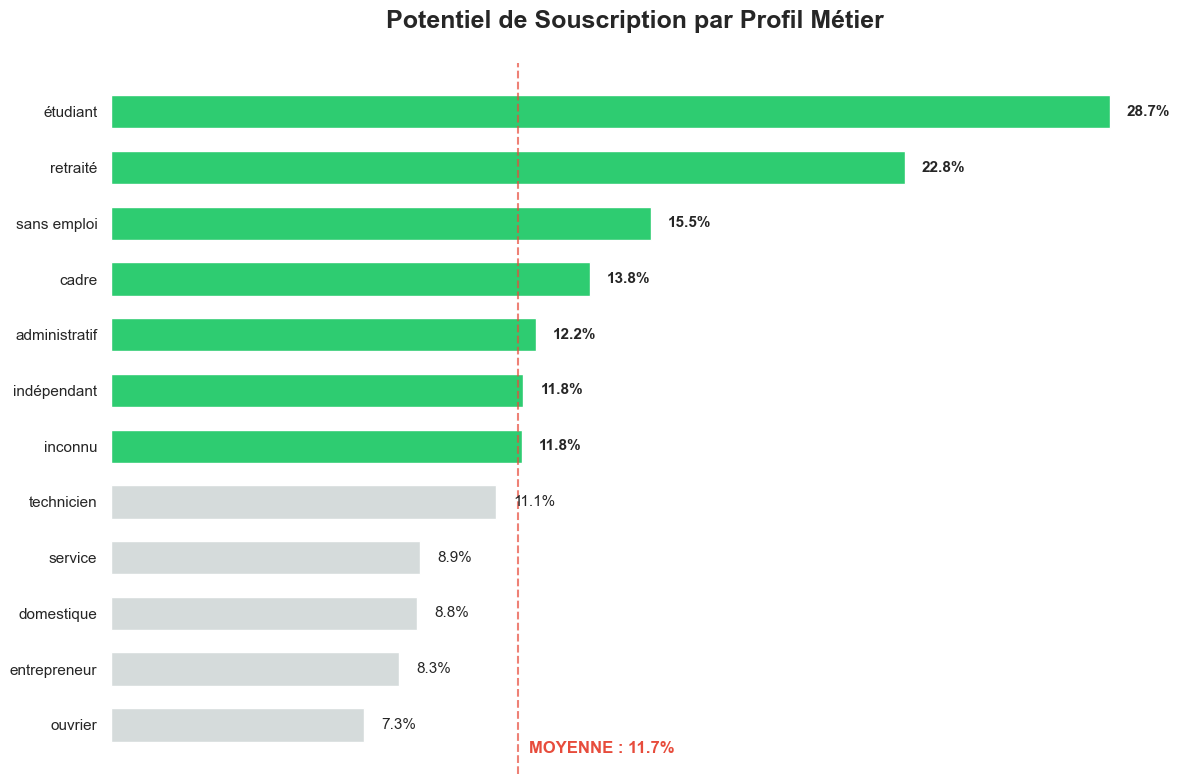

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcul des statistiques
moyenne_globale = (df_bank_marketing_clean["cible"] == "yes").mean() * 100

df_perf = (
    df_bank_marketing_clean
    .groupby("metier")["cible"]
    .apply(lambda x: (x == "yes").mean() * 100)
    .reset_index(name="taux")
    .sort_values("taux", ascending=True)
)

# 2. Visualisation Premium
plt.figure(figsize=(12, 8))
sns.set_style("white")

# Palette : Mise en avant de ceux qui dépassent la moyenne
colors = ['#2ECC71' if x > moyenne_globale else '#D5DBDB' for x in df_perf['taux']]

ax = plt.barh(df_perf['metier'], df_perf['taux'], color=colors, height=0.6)

# Labels de données
for i, v in enumerate(df_perf['taux']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=11,
             fontweight='bold' if v > moyenne_globale else 'normal')

# Ligne de moyenne globale
plt.axvline(moyenne_globale, color='#E74C3C', linestyle='--', linewidth=1.5, alpha=0.7)
plt.text(moyenne_globale + 0.3, -0.5, f"MOYENNE : {moyenne_globale:.1f}%", color='#E74C3C', fontweight='bold')

# Nettoyage cosmétique
plt.title("Potentiel de Souscription par Profil Métier", fontsize=18, pad=25, fontweight='bold')
plt.xticks([])
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [124]:
# 3. INTERPRÉTATION "BUSINESS CASE"
print("-" * 50)
# On filtre les profils qui surperforment
tops = df_perf[df_perf['taux'] > moyenne_globale].sort_values('taux', ascending=False)
for index, row in tops.iterrows():
    multiplicateur = row['taux'] / moyenne_globale
    print(f"PROFIL : {row['metier'].upper()}"
    f" Le taux de souscription est de {row['taux']:.1f}%."
    f" Cela signifie qu'un {row['metier']} souscrit {multiplicateur:.1f} FOIS PLUS que la moyenne.\n")

print(f"💡 CONCLUSION : Pour maximiser vos revenus, concentrez vos ressources sur les {tops.iloc[0]['metier']}s.")

--------------------------------------------------
PROFIL : ÉTUDIANT Le taux de souscription est de 28.7%. Cela signifie qu'un étudiant souscrit 2.5 FOIS PLUS que la moyenne.

PROFIL : RETRAITÉ Le taux de souscription est de 22.8%. Cela signifie qu'un retraité souscrit 1.9 FOIS PLUS que la moyenne.

PROFIL : SANS EMPLOI Le taux de souscription est de 15.5%. Cela signifie qu'un sans emploi souscrit 1.3 FOIS PLUS que la moyenne.

PROFIL : CADRE Le taux de souscription est de 13.8%. Cela signifie qu'un cadre souscrit 1.2 FOIS PLUS que la moyenne.

PROFIL : ADMINISTRATIF Le taux de souscription est de 12.2%. Cela signifie qu'un administratif souscrit 1.0 FOIS PLUS que la moyenne.

PROFIL : INDÉPENDANT Le taux de souscription est de 11.8%. Cela signifie qu'un indépendant souscrit 1.0 FOIS PLUS que la moyenne.

PROFIL : INCONNU Le taux de souscription est de 11.8%. Cela signifie qu'un inconnu souscrit 1.0 FOIS PLUS que la moyenne.

💡 CONCLUSION : Pour maximiser vos revenus, concentrez vos re

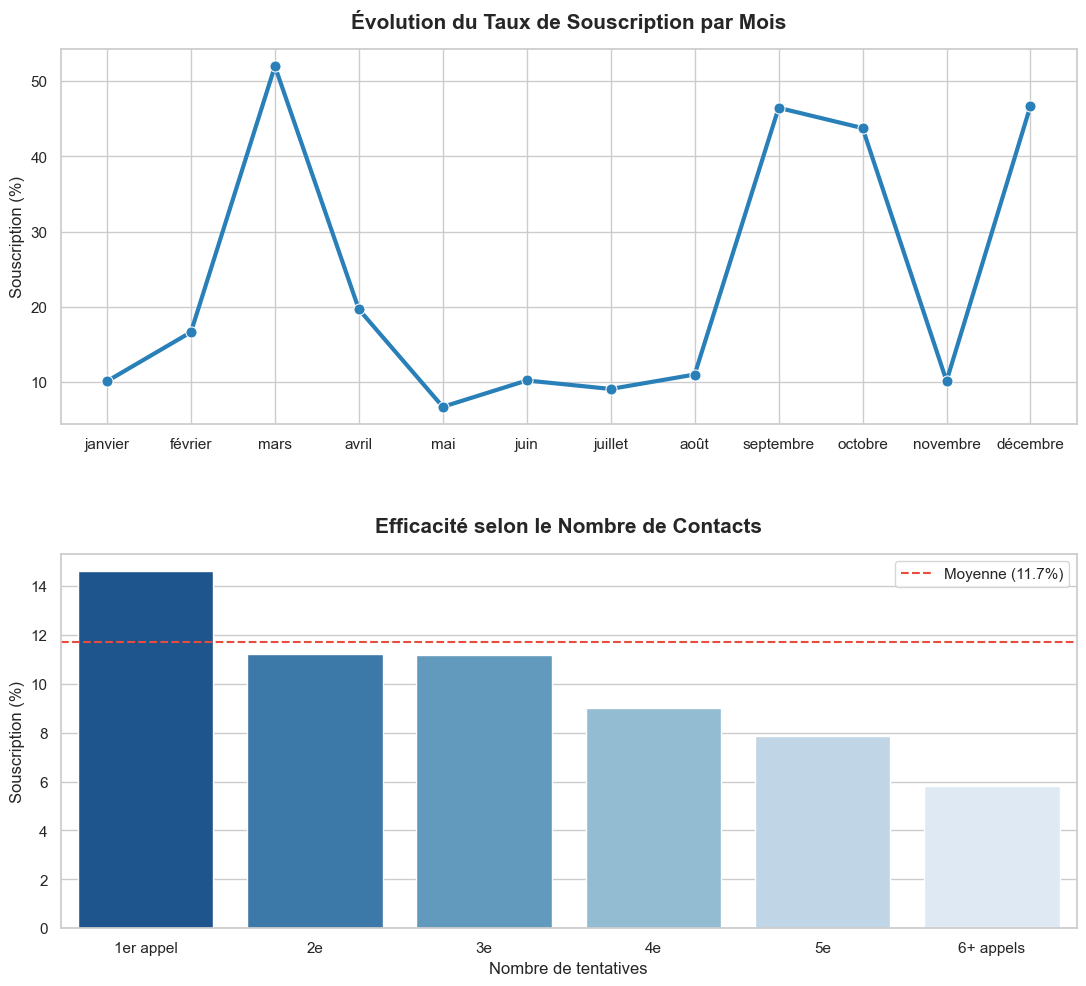

--------------------------------------------------
📊 RAPPORT D'ANALYSE COMMERCIALE
--------------------------------------------------
✅ PIC SAISONNIER : Le mois de MARS est le plus favorable (52.0%).
✅ RENTABILITÉ : Le 1er appel est 2.5 FOIS PLUS efficace que le 6ème.
✅ DIAGNOSTIC : On observe une chute libre après le 3ème contact. 
   La pression commerciale excessive nuit au taux de souscription.
--------------------------------------------------


In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. PRÉPARATION DES DONNÉES ---

# A. Saisonnalité (Tri chronologique)
ordre_mois = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin',
              'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']

ss_mois = (
    df_bank_marketing_clean
    .groupby("mois")["cible"]
    .apply(lambda x: (x == "yes").mean() * 100)
    .reindex(ordre_mois)
    .reset_index(name="taux")
)

# B. Pression Commerciale (Regroupement à 6+ appels)
df_bank_marketing_clean['pression'] = df_bank_marketing_clean['nb_appels_campagne'].clip(upper=6)
ss_pression = (
    df_bank_marketing_clean
    .groupby("pression")["cible"]
    .apply(lambda x: (x == "yes").mean() * 100)
    .reset_index(name="taux")
)

# C. Indicateurs globaux
moyenne_globale = (df_bank_marketing_clean["cible"] == "yes").mean() * 100

# --- 2. VISUALISATION ---

sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 11))

# Graphique 1 : Courbe de Saisonnalité
sns.lineplot(data=ss_mois, x="mois", y="taux", marker="o", markersize=8,
             linewidth=3, color="#2980B9", ax=ax1)
ax1.set_title("Évolution du Taux de Souscription par Mois", fontsize=15, pad=15, fontweight='bold')
ax1.set_ylabel("Souscription (%)")
ax1.set_xlabel("")

# Graphique 2 : Impact de la Répétition des Appels
sns.barplot(data=ss_pression, x="pression", y="taux", palette="Blues_r", ax=ax2)
ax2.axhline(moyenne_globale, color='#E74C3C', linestyle='--', label=f"Moyenne ({moyenne_globale:.1f}%)")
ax2.set_title("Efficacité selon le Nombre de Contacts", fontsize=15, pad=15, fontweight='bold')
ax2.set_xticklabels(['1er appel', '2e', '3e', '4e', '5e', '6+ appels'])
ax2.set_ylabel("Souscription (%)")
ax2.set_xlabel("Nombre de tentatives")
ax2.legend()

plt.tight_layout(pad=4)
plt.show()

# --- 3. INTERPRÉTATION AUTOMATIQUE ---

best_m = ss_mois.loc[ss_mois['taux'].idxmax(), 'mois']
best_val = ss_mois['taux'].max()
perf_1 = ss_pression.iloc[0]['taux']
perf_6 = ss_pression.iloc[-1]['taux']
ratio = perf_1 / perf_6

print("-" * 50)
print("📊 RAPPORT D'ANALYSE COMMERCIALE")
print("-" * 50)
print(f"✅ PIC SAISONNIER : Le mois de {best_m.upper()} est le plus favorable ({best_val:.1f}%).")
print(f"✅ RENTABILITÉ : Le 1er appel est {ratio:.1f} FOIS PLUS efficace que le 6ème.")
print(f"✅ DIAGNOSTIC : On observe une chute libre après le 3ème contact. ")
print(f"   La pression commerciale excessive nuit au taux de souscription.")
print("-" * 50)